This notebook based on tutorial was created by [Greg Kamradt](https://github.com/FullStackRetrieval-com/RetrievalTutorials/blob/main/tutorials/LevelsOfTextSplitting/5_Levels_Of_Text_Splitting.ipynb). MIT license.

# 5 Levels Of Text Splitting
Levels Of Text Splitting

* Level 1: Character Splitting - Simple static character chunks of data
* Level 2: Recursive Character Text Splitting - Recursive chunking based on a list of separators
* Level 3: Document Specific Splitting - Various chunking methods for different document types (PDF, Python, Markdown)
* Level 4: Semantic Splitting - Embedding walk based chunking
* Level 5: Agentic Splitting - Experimental method of splitting text with an agent-like system.

## Set up

In [ ]:
%pip install -q -U langchain langchain_google_genai langchain_community pillow matplotlib

In [ ]:
%pip install -q google-generativeai==0.7.0 sentence-transformers

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import sys; sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import google.generativeai as genai

if "GOOGLE_API_KEY" not in os.environ:
  os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [ ]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


## Level 1: Character Splitting
Character splitting is the most basic form of splitting up your text. It is the process of simply dividing your text into N-character sized chunks regardless of their content or form.

This method isn't recommended for any applications - but it's a great starting point for us to understand the basics.

* Pros: Easy & Simple
* Cons: Very rigid and doesn't take into account the structure of your text

Concepts to know:

* Chunk Size - The number of characters you would like in your chunks. 50, 100, 100,000, etc.
* Chunk Overlap - The amount you would like your sequential chunks to overlap.

This is to try to avoid cutting a single piece of context into multiple pieces. This will create duplicate data across chunks.

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size = 100, chunk_overlap=20, separator='', strip_whitespace=False)

In [ ]:
text = """In the vast expanse of the digital age, information flows like a never-ending river.
From the early dawn of the internet to the present day, technology has revolutionized the way we communicate, learn, and entertain ourselves.
The advent of social media platforms has bridged distances, allowing friends and family to stay connected regardless of geographical barriers.
Educational resources have become more accessible, with online courses and digital libraries opening doors to knowledge for millions around the world.

Yet, with all its advancements, the digital age also presents significant challenges.
Privacy concerns loom large as personal data becomes a valuable commodity.
The spread of misinformation can sway public opinion and impact elections, underscoring the need for critical thinking and digital literacy.
As we navigate this ever-changing landscape, it's crucial to balance the benefits of technology with mindful consideration of its potential drawbacks.

Despite these challenges, the potential for positive impact remains immense.
Innovations in healthcare, such as telemedicine and AI-driven diagnostics, are transforming patient care.
Sustainable technologies are helping to address climate change, offering hope for a greener future.
The digital age, with all its complexities, holds the promise of continued progress and the betterment of society.
It is up to us to harness its power responsibly and ethically, ensuring that the river of information serves the greater good.
"""

In [ ]:
text_splitter.create_documents([text])


[Document(page_content='In the vast expanse of the digital age, information flows like a never-ending river.\nFrom the early '),
 Document(page_content='ver.\nFrom the early dawn of the internet to the present day, technology has revolutionized the way w'),
 Document(page_content='lutionized the way we communicate, learn, and entertain ourselves.\nThe advent of social media platfo'),
 Document(page_content=' social media platforms has bridged distances, allowing friends and family to stay connected regardl'),
 Document(page_content='ay connected regardless of geographical barriers.\nEducational resources have become more accessible,'),
 Document(page_content='ome more accessible, with online courses and digital libraries opening doors to knowledge for millio'),
 Document(page_content='knowledge for millions around the world.\n\nYet, with all its advancements, the digital age also prese'),
 Document(page_content='gital age also presents significant challenges.\nPrivacy concerns loom lar

## Level 2: Recursive Character Text Splitting
Let's jump a level of complexity.

The problem with Level #1 is that we don't take into account the structure of our document at all. We simply split by a fix number of characters.

The Recursive Character Text Splitter helps with this. With it, we'll specify a series of separatators which will be used to split our docs.

You can see the default separators for LangChain here. Let's take a look at them one by one.

* "\n\n" - Double new line, or most commonly paragraph breaks
* "\n" - New lines
* " " - Spaces
* "" - Characters


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter_02 = RecursiveCharacterTextSplitter(chunk_size = 100, chunk_overlap=0)

In [ ]:
text_splitter_02.create_documents([text])

[Document(page_content='In the vast expanse of the digital age, information flows like a never-ending river.'),
 Document(page_content='From the early dawn of the internet to the present day, technology has revolutionized the way we'),
 Document(page_content='communicate, learn, and entertain ourselves.'),
 Document(page_content='The advent of social media platforms has bridged distances, allowing friends and family to stay'),
 Document(page_content='connected regardless of geographical barriers.'),
 Document(page_content='Educational resources have become more accessible, with online courses and digital libraries'),
 Document(page_content='opening doors to knowledge for millions around the world.'),
 Document(page_content='Yet, with all its advancements, the digital age also presents significant challenges.'),
 Document(page_content='Privacy concerns loom large as personal data becomes a valuable commodity.'),
 Document(page_content='The spread of misinformation can sway public opinio

## Level 3: Document Specific Splitting
Stepping up our levels ladder, let's start to handle document types other than normal prose in a .txt. What if you have pictures? or a PDF? or code snippets?

Our first two levels wouldn't work great for this so we'll need to find a different tactic.

This level is all about making your chunking strategy fit your different data formats. Let's run through a bunch of examples of this in action

The Markdown, Python, and JS splitters will basically be similar to Recursive Character, but with different separators.

See all of LangChains document splitters [here](https://github.com/langchain-ai/langchain/blob/9ef2feb6747f5a69d186bd623b569ad722829a5e/libs/langchain/langchain/text_splitter.py#L1069) and Llama Index (HTML, JSON, Markdown)

### Markdown

Separators:

* \n#{1,6} - Split by new lines followed by a header (H1 through H6)
* ```\n - Code blocks
* \n\\*\\*\\*+\n - Horizontal Lines
* \n---+\n - Horizontal Lines
* \n___+\n - Horizontal Lines
* \n\n Double new lines
* \n - New line
* " " - Spaces
* "" - Character

In [ ]:
from langchain.text_splitter import MarkdownTextSplitter
splitter = MarkdownTextSplitter(chunk_size = 40, chunk_overlap=0)

In [ ]:
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""
splitter.create_documents([markdown_text])

[Document(page_content='# Fun in California\n\n## Driving'),
 Document(page_content='Try driving on the 1 down to San Diego'),
 Document(page_content='### Food'),
 Document(page_content="Make sure to eat a burrito while you're"),
 Document(page_content='there'),
 Document(page_content='## Hiking\n\nGo to Yosemite')]

### Python code

* \nclass - Classes first
* \ndef - Functions next
* \n\tdef - Indented functions
* \n\n - Double New lines
* \n - New Lines
* " " - Spaces
* "" - Characters

In [ ]:
from langchain.text_splitter import PythonCodeTextSplitter
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)

In [ ]:
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""
python_splitter.create_documents([python_text])

[Document(page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'),
 Document(page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')]

### JS
Very similar to python.

Separators:

* \nfunction - Indicates the beginning of a function declaration
* \nconst - Used for declaring constant variables
* \nlet - Used for declaring block-scoped variables
* \nvar - Used for declaring a variable
* \nclass - Indicates the start of a class definition
* \nif - Indicates the beginning of an if statement
* \nfor - Used for for-loops
* \nwhile - Used for while-loops
* \nswitch - Used for switch statements
* \ncase - Used within switch statements
* \ndefault - Also used within switch statements
* \n\n - Indicates a larger separation in text or code
* \n - Separates lines of code or text
* " " - Separates words or tokens in the code
* "" - Makes every character a separate element

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=65, chunk_overlap=0
)

In [ ]:
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""

js_splitter.create_documents([javascript_text])

[Document(page_content='// Function is called, the return value will end up in x'),
 Document(page_content='let x = myFunction(4, 3);'),
 Document(page_content='function myFunction(a, b) {'),
 Document(page_content='// Function returns the product of a and b\n  return a * b;\n}')]

### PDFs w/ tables
Ok now things will get a bit spicier.

PDFs are an extremely common data type for language model work. Often they'll contain tables that contain information.

This could be financial data, studies, academic papers, etc.

Trying to split tables by a character based separator isn't reliable. We need to try out a different method.

A very convenient way to do this is with Unstructured, a library dedicated to making your data LLM ready.

In [ ]:
print("Current Directory:", os.getcwd())
print("Files in the current directory:", os.listdir('./data/statics'))


Current Directory: /content


FileNotFoundError: [Errno 2] No such file or directory: './data/statics'

In [ ]:
import PIL.Image

img = PIL.Image.open(r'/content/drive/MyDrive/RAG_end_to_end/data/statics/image.jpg')
img

In [ ]:
filename = "/data/The_Effects_of_IFRS_on_Financial_Ratios_Early_Evid.pdf"

In [ ]:
def generate_response(prompt:str, model, temperature = 0.3, max_output = 16384):

  # Set up the model
  generation_config = {
    "temperature": temperature,
    "max_output_tokens": max_output,
  }

  model = genai.GenerativeModel(model_name = model,generation_config=generation_config)

  try:
    response = model.generate_content(prompt)
    return response.text
  except Exception as exception:
    print("Error generating response:", exception)

In [ ]:
response = generate_response("Hello", model="gemini-pro")
print(response)

Hello there! How can I assist you today?


In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    "Tell me a {adjective} joke about {content}."
)
prompt = prompt_template.format(adjective="funny", content="chickens")
generate_response(prompt, model="gemini-1.5-flash-latest")

'Why did the chicken cross the playground? \n\nTo get to the other slide! 🐔😂 \n'

In [ ]:
from IPython.display import display
from IPython.display import Markdown
import pathlib
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Level 4: Semantic Splitting - Embedding walk based chunking

In [ ]:
!pip install -qU "semantic-router[processing]==0.0.24"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
text = """
# LLM Agents: Enhancing AI Capabilities

## Introduction to LLM Agents

Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities. These agents leverage the vast knowledge and language understanding of LLMs to interact with their environment, make decisions, and perform tasks with minimal human intervention.

## Key Components of LLM Agents

### 1. Large Language Model Core

At the heart of an LLM Agent is a powerful language model such as GPT-4, PaLM, or Claude. This core provides:

- Natural language understanding and generation
- Vast knowledge across diverse domains
- Ability to process and respond to complex queries

### 2. Action Space

The action space defines the set of operations an LLM Agent can perform. This may include:

- Web searches
- API calls
- Database queries
- File system operations
- External tool interactions

Example,
```python
import requests

# Example of a function for making a web search
def web_search(query):
    response = requests.get(f"https://api.duckduckgo.com/?q={query}&format=json")
    results = response.json()["RelatedTopics"]
    return results[:3]  # Return top 3 results

# Example of a function to call a weather API
def get_weather(city):
    response = requests.get(f"http://api.weatherapi.com/v1/current.json?key=your_api_key&q={city}")
    return response.json()["current"]

# Example usage
print(web_search("OpenAI"))
print(get_weather("London"))
```

### 3. Planning and Reasoning Module

This component enables the agent to:

- Break down complex tasks into manageable steps
- Formulate strategies to achieve goals
- Adapt plans based on new information or obstacles

Example,
```python
class PlanningModule:
    def break_down_task(self, task):
        # Simplified task breakdown
        steps = [
            f"Step 1: Analyze {task}",
            f"Step 2: Research {task}",
            f"Step 3: Implement solution for {task}",
            f"Step 4: Test and validate {task}"
        ]
        return steps

    def adapt_plan(self, original_plan, new_information):
        # Simplified plan adaptation
        adapted_plan = original_plan.copy()
        adapted_plan.append(f"Additional step: Incorporate {new_information}")
        return adapted_plan

planner = PlanningModule()
task = "Develop an AI chatbot"
initial_plan = planner.break_down_task(task)
adapted_plan = planner.adapt_plan(initial_plan, "Natural Language Processing")
```

### 4. Memory Systems

LLM Agents often incorporate various memory types:

- Short-term memory: For maintaining context within a conversation or task
- Long-term memory: For storing and retrieving information across multiple sessions
- Episodic memory: For learning from past experiences and improving performance over time

Example,
```python
class MemorySystem:
    def __init__(self):
        self.short_term_memory = []
        self.long_term_memory = {}
        self.episodic_memory = []

    def add_to_short_term(self, item):
        self.short_term_memory.append(item)
        if len(self.short_term_memory) > 5:  # Limit short-term memory
            self.short_term_memory.pop(0)

    def add_to_long_term(self, key, value):
        self.long_term_memory[key] = value

    def add_to_episodic(self, episode):
        self.episodic_memory.append(episode)

    def retrieve_from_long_term(self, key):
        return self.long_term_memory.get(key, "Not found")

memory = MemorySystem()
memory.add_to_short_term("Recent user query")
memory.add_to_long_term("user_preference", "Dark mode")
memory.add_to_episodic({"task": "Web search", "result": "Successful"})
```

### 5. Perception Module

This allows the agent to process and understand various input types:

- Text input
- Structured data
- Images (in multimodal systems)
- Audio (in speech-enabled agents)

Example,
```python
import json
from PIL import Image

class PerceptionModule:
    def process_text(self, text):
        return f"Processed text: {text}"

    def process_structured_data(self, data):
        return json.loads(data)

    def process_image(self, image_path):
        image = Image.open(image_path)
        # Simplified image processing
        return f"Processed image of size {image.size}"

perception = PerceptionModule()
text_result = perception.process_text("Hello, AI!")
json_result = perception.process_structured_data('{"name": "AI Agent", "type": "LLM"}')
image_result = perception.process_image("example.jpg")
```

### 6. Output Generation and Refinement

Responsible for producing coherent and appropriate responses, this module may include:

- Response filtering for safety and relevance
- Style adaptation based on user preferences or task requirements
- Multi-turn response generation for complex interactions

Example,
```
class OutputModule:
    def __init__(self, safety_filter, style_adapter):
        self.safety_filter = safety_filter
        self.style_adapter = style_adapter

    def generate_response(self, content):
        filtered_content = self.safety_filter(content)
        styled_content = self.style_adapter(filtered_content)
        return styled_content

    def multi_turn_generation(self, conversation):
        response = ""
        for turn in conversation:
            response += self.generate_response(turn) + " "
        return response.strip()

def simple_safety_filter(content):
    # Simplified safety filter
    unsafe_words = ["unsafe", "harmful"]
    for word in unsafe_words:
        content = content.replace(word, "[FILTERED]")
    return content

def simple_style_adapter(content):
    # Simplified style adapter
    return content.upper()

output_module = OutputModule(simple_safety_filter, simple_style_adapter)
response = output_module.generate_response("This is a safe response.")
multi_turn = output_module.multi_turn_generation(["Hello", "How are you?"])
```

## Applications of LLM Agents

LLM Agents find applications in numerous fields:

1. **Customer Service**: Handling complex customer queries and providing personalized assistance
2. **Research and Analysis**: Conducting literature reviews, data analysis, and generating reports
3. **Personal Assistants**: Managing schedules, answering questions, and performing tasks on behalf of users
4. **Education**: Providing personalized tutoring and answering student questions across various subjects
5. **Healthcare**: Assisting in diagnosis, treatment planning, and patient education
6. **Software Development**: Helping with code generation, debugging, and documentation
7. **Creative Writing**: Assisting authors with story development, character creation, and editing

## Challenges and Considerations

Despite their potential, LLM Agents face several challenges:

### Ethical Considerations

- Ensuring privacy and data security
- Preventing biased or discriminatory outputs
- Maintaining transparency about AI involvement in interactions

### Technical Challenges

- Handling ambiguity and uncertainty in complex scenarios
- Maintaining coherence and consistency across long interactions
- Integrating with external systems and APIs securely and efficiently

### Performance and Scalability

- Optimizing response times for real-time applications
- Managing computational resources for large-scale deployments
- Balancing accuracy with efficiency in resource-constrained environments

## Future Directions

The field of LLM Agents is rapidly evolving, with several exciting areas of development:

1. **Multimodal Agents**: Integrating vision, speech, and other sensory inputs for more comprehensive understanding and interaction
2. **Collaborative Agents**: Developing systems where multiple agents work together to solve complex problems
3. **Continual Learning**: Implementing mechanisms for agents to learn and improve from ongoing interactions without full retraining
4. **Explainable AI**: Enhancing the ability of agents to provide clear reasoning for their decisions and actions
5. **Domain-Specific Agents**: Creating highly specialized agents for fields like law, medicine, or engineering
6. **Emotional Intelligence**: Developing agents capable of recognizing and responding to human emotions effectively

## Best Practices for Implementing LLM Agents

When developing and deploying LLM Agents, consider the following best practices:

1. **Clear Scope Definition**: Clearly define the agent's capabilities and limitations to manage user expectations
2. **Robust Testing**: Implement comprehensive testing protocols, including edge cases and potential failure modes
3. **User Feedback Integration**: Establish mechanisms to collect and incorporate user feedback for continuous improvement
4. **Ethical Guidelines**: Develop and adhere to strict ethical guidelines for agent behavior and decision-making
5. **Fallback Mechanisms**: Implement graceful degradation and human handoff options for situations beyond the agent's capabilities
6. **Performance Monitoring**: Set up robust monitoring systems to track agent performance, detect anomalies, and ensure reliability
7. **Version Control**: Maintain careful version control of agent models and configurations to manage updates and rollbacks effectively

## Conclusion

LLM Agents represent a powerful fusion of natural language processing, decision-making algorithms, and task automation. As these systems continue to evolve, they promise to revolutionize how we interact with AI, potentially transforming industries and opening new frontiers in human-AI collaboration. However, their development and deployment must be guided by careful consideration of ethical implications, technical challenges, and the need for responsible AI practices.
"""

#### Recursive Character TextSplitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 100, chunk_overlap=10)
text_splitter.create_documents([text])

[Document(page_content='# LLM Agents: Enhancing AI Capabilities\n\n## Introduction to LLM Agents'),
 Document(page_content='Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence,'),
 Document(page_content='combining the power of language models with autonomous decision-making capabilities. These agents'),
 Document(page_content='agents leverage the vast knowledge and language understanding of LLMs to interact with their'),
 Document(page_content='their environment, make decisions, and perform tasks with minimal human intervention.'),
 Document(page_content='## Key Components of LLM Agents\n\n### 1. Large Language Model Core'),
 Document(page_content='At the heart of an LLM Agent is a powerful language model such as GPT-4, PaLM, or Claude. This core'),
 Document(page_content='This core provides:'),
 Document(page_content='- Natural language understanding and generation\n- Vast knowledge across diverse domains'),
 Document(page_content='- Abilit

#### Markdown TextSplitter

In [ ]:
from langchain.text_splitter import MarkdownTextSplitter
splitter = MarkdownTextSplitter(chunk_size = 300, chunk_overlap=0)
splitter.create_documents([text])

[Document(page_content='# LLM Agents: Enhancing AI Capabilities\n\n## Introduction to LLM Agents'),
 Document(page_content='Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities. These agents leverage the vast knowledge and language understanding of LLMs to interact with their environment, make'),
 Document(page_content='decisions, and perform tasks with minimal human intervention.'),
 Document(page_content='## Key Components of LLM Agents\n\n### 1. Large Language Model Core\n\nAt the heart of an LLM Agent is a powerful language model such as GPT-4, PaLM, or Claude. This core provides:'),
 Document(page_content='- Natural language understanding and generation\n- Vast knowledge across diverse domains\n- Ability to process and respond to complex queries\n\n### 2. Action Space\n\nThe action space defines the set of operations an LLM Agent can perform. This may in

In [ ]:
from semantic_router.splitters import RollingWindowSplitter
from semantic_router.encoders import HuggingFaceEncoder

encoder = HuggingFaceEncoder(name = "mixedbread-ai/mxbai-embed-large-v1")
encoder.score_threshold = 0.7

splitter = RollingWindowSplitter(
    encoder=encoder,
    min_split_tokens=100,
    max_split_tokens=500,
    window_size=5,  # sentences
    plot_splits=True,
    dynamic_threshold=False,
)

2024-07-09 13:24:33 WARNING semantic_router.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically splitting.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 115 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 130 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 102 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 105 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 108 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 133 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 100 tokens due to threshold 0.7.
2024-07-09 13:25:38 INFO semantic_router.utils.logger Split finalized with 10

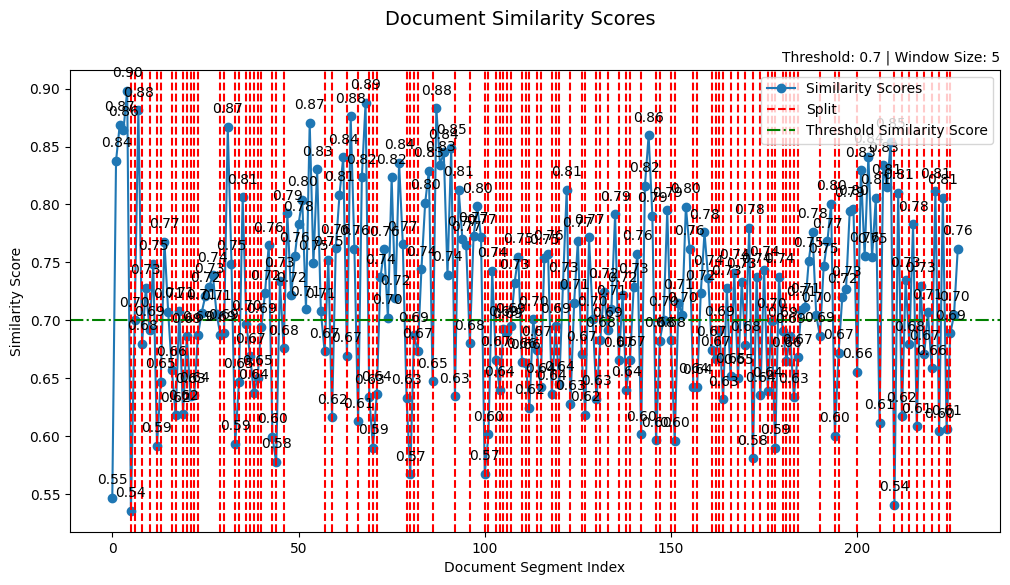

In [ ]:
from semantic_router.splitters import utils
from matplotlib import cbook

sentences = utils.split_to_sentences(text)
splits = splitter([text])

In [ ]:
splitter.print(splits)

Split 1, tokens 115, triggered by: 0.68
# LLM Agents: Enhancing AI Capabilities ## Introduction to LLM Agents Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities. These agents leverage the vast knowledge and language understanding of LLMs to interact with their environment, make decisions, and perform tasks with minimal human intervention. ## Key Components of LLM Agents ### 1. Large Language Model Core At the heart of an LLM Agent is a powerful language model such as GPT-4, PaLM, or Claude.
----------------------------------------------------------------------------------------


Split 2, tokens 130, triggered by: 0.69
This core provides: - Natural language understanding and generation - Vast knowledge across diverse domains - Ability to process and respond to complex queries ### 2. Action Space The action space defines the set of operations an LLM Agent ca

In [ ]:
import re

def split_into_sentences(text):
    # Split the text into lines
    lines = text.split('\n')
    sentences = []

    for line in lines:
        line = line.strip()
        if line:
            # Check if the line starts with a header
            if re.match(r'^#+\s', line):
                sentences.append(line)
            else:
                # Split the line into sentences
                line_sentences = re.split(r'(?<=[.!?])\s+', line)
                sentences.extend(line_sentences)

    return sentences


# Split the text into sentences
single_sentences_list = split_into_sentences(text)

print (f"{len(single_sentences_list)} senteneces were found")

210 senteneces were found


In [ ]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '# LLM Agents: Enhancing AI Capabilities', 'index': 0},
 {'sentence': '## Introduction to LLM Agents', 'index': 1},
 {'sentence': 'Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities.',
  'index': 2}]

In [ ]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)
sentences[:3]

[{'sentence': '# LLM Agents: Enhancing AI Capabilities',
  'index': 0,
  'combined_sentence': '# LLM Agents: Enhancing AI Capabilities ## Introduction to LLM Agents'},
 {'sentence': '## Introduction to LLM Agents',
  'index': 1,
  'combined_sentence': '# LLM Agents: Enhancing AI Capabilities ## Introduction to LLM Agents Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities.'},
 {'sentence': 'Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities.',
  'index': 2,
  'combined_sentence': '## Introduction to LLM Agents Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities. These agents leverage the vast knowledge

In [ ]:
from sentence_transformers import SentenceTransformer

Emb = SentenceTransformer('BAAI/bge-small-en-v1.5')
embeddings = Emb.encode([x['combined_sentence'] for x in sentences], batch_size=16, show_progress_bar = True, normalize_embeddings = True)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']

        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]

        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [ ]:
distances, sentences = calculate_cosine_distances(sentences)
distances[:3]

[0.1505967378616333, 0.01854151487350464, 0.017657160758972168]

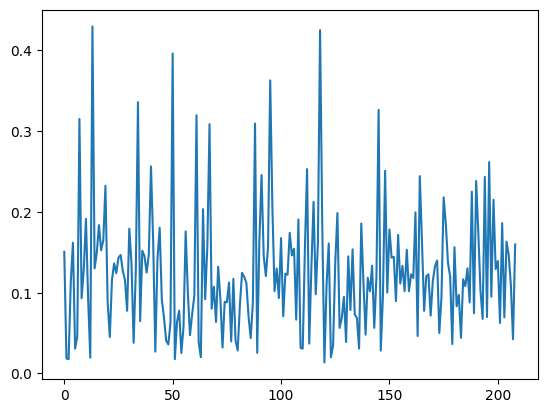

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances)
plt.show()

In [ ]:
max_distance = max(distances)
max_distance

0.4296928644180298

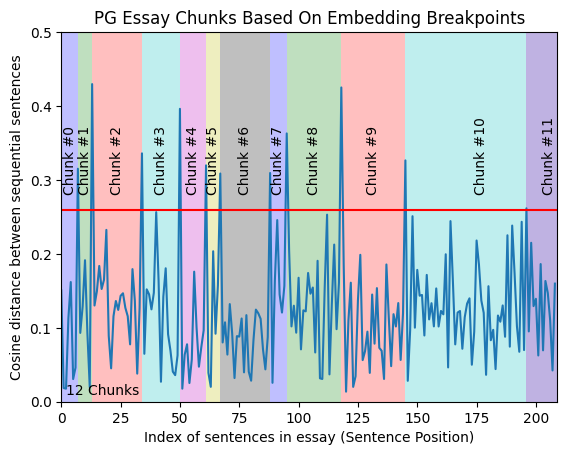

In [ ]:
import numpy as np

plt.plot(distances);

y_upper_bound = round(max_distance * 2) / 2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()


In [ ]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)

    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [ ]:
import pprint
for i, chunk in enumerate(chunks):
    buffer = 200

    print (f"Chunk #{i}")
    # print (chunk[:buffer].strip())
    # print ("...")
    # print (chunk[-buffer:].strip())
    print(chunk)
    print ("\n")

Chunk #0
# LLM Agents: Enhancing AI Capabilities ## Introduction to LLM Agents Large Language Model (LLM) Agents represent a significant advancement in artificial intelligence, combining the power of language models with autonomous decision-making capabilities. These agents leverage the vast knowledge and language understanding of LLMs to interact with their environment, make decisions, and perform tasks with minimal human intervention. ## Key Components of LLM Agents ### 1. Large Language Model Core At the heart of an LLM Agent is a powerful language model such as GPT-4, PaLM, or Claude. This core provides:


Chunk #1
- Natural language understanding and generation - Vast knowledge across diverse domains - Ability to process and respond to complex queries ### 2. Action Space The action space defines the set of operations an LLM Agent can perform. This may include:


Chunk #2
- Web searches - API calls - Database queries - File system operations - External tool interactions Example, ``

## Level 5: Agentic Chunking

Using LLM to chuking text for better performance.

Example: `Greg went to the park. He likes walking` > `['Greg went to the park.', 'Greg likes walking']`

In this case, I use Llama3-8B from Groq

In [ ]:
%pip install -qU langchain-groq langchain-google-genai

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
if "GOOGLE_API_KEY" not in os.environ:
  os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", google_api_key = os.environ["GOOGLE_API_KEY"], temperature = 0.3)
llm.invoke("Sing a ballad of LangChain.").content

"(Verse 1)\nIn realms of code, where data flows,\nA hero rose, LangChain, it shows.\nWith chains of thought, it weaves its way,\nThrough language's maze, come what may.\n\n(Chorus)\nOh, LangChain, LangChain, a tool so grand,\nConnecting minds, across the land.\nFrom prompts to tasks, it takes the lead,\nUnlocking knowledge, a mighty deed.\n\n(Verse 2)\nWith LLM's power, it takes its stand,\nA bridge between man and machine, hand in hand.\nFrom simple queries to complex schemes,\nIt solves the puzzles, fulfills our dreams.\n\n(Chorus)\nOh, LangChain, LangChain, a tool so grand,\nConnecting minds, across the land.\nFrom prompts to tasks, it takes the lead,\nUnlocking knowledge, a mighty deed.\n\n(Verse 3)\nThrough chains of prompts, it guides the flow,\nOf information, making it grow.\nWith memory banks, it holds the key,\nTo context rich, for all to see.\n\n(Chorus)\nOh, LangChain, LangChain, a tool so grand,\nConnecting minds, across the land.\nFrom prompts to tasks, it takes the lead,

In [ ]:
from langchain_groq import ChatGroq
if "GROG_API_KEY" not in os.environ:
  os.environ["GROG_API_KEY"] = userdata.get('GROQ_API_KEY')

chat = ChatGroq(model_name="llama3-8b-8192", api_key = os.environ["GROQ_API_KEY"], temperature=0.3)

system = "You are a helpful assistant."
human = "{text}"
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chain = prompt | chat
chain.invoke({"text": "Explain the importance of low latency for LLMs."})

APIConnectionError: Connection error.

In [ ]:
from groq import Groq
try:
    # Load API keys from environment variable
    groq_api_key = os.environ["GROQ_API_KEY"]
    groq_llm = Groq(api_key=groq_api_key)
except Exception as exception:
    print("Error in initializing API keys:", exception)
    raise

messages = [
    {
        "role": "system",
        "content": "You are a helpful AI system"
        },
         {
             "role": "user",
             "content": "Explain the importance of low latency for LLMs."
         },
    ]

response = groq_llm.chat.completions.create(
    model="llama3-8b-8192",
    messages=messages,
    max_tokens=1000,
)

response_text = response.choices[0].message.content

APIConnectionError: Connection error.

In [ ]:
text = "The month is October."

In [ ]:
new_chunk_id = str(uuid.uuid4())[:5]
new_chunk_id

'f3f22'

In [ ]:
chunks ={}
chunks[new_chunk_id] = {
    'chunk_id' : new_chunk_id,
    'context': [text],
    'title' : '',
    'summary': '',
    'chunk_index' : 1
}
chunks

{'f3f22': {'chunk_id': 'f3f22',
  'context': ['The month is October.'],
  'title': '',
  'summary': '',
  'chunk_index': 1}}

In [ ]:
def get_new_chunk_summary(llm, context):
    PROMPT = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                """
                You are an AI tasked with organizing and summarizing information into thematic chunks. Your role is to create concise, one-sentence summaries for new chunks based on individual propositions.

                Guidelines for creating summaries:
                1. Provide a brief, informative overview of the chunk's main topic.
                2. Generalize concepts to broader categories when possible (e.g., "apples" to "food", "July" to "date and time").
                3. Anticipate potential related information that could be added to the chunk.
                4. Ensure the summary is clear, concise, and easily understandable.
                5. If relevant, include guidance on what type of information would fit well in this chunk.

                You will receive a single context that will form the basis of a new chunk. Your task is to create an appropriate summary for this new chunk.

                Examples:
                1. Context: Greg likes to eat pizza
                  Summary: This chunk contains information about Greg's food preferences and eating habits.

                2. Context: The meeting is scheduled for March 15th
                  Summary: This chunk includes details about event dates, times, and scheduling information.

                3. Context: The Eiffel Tower is located in Paris
                  Summary: This chunk covers information about famous landmarks and their locations around the world.

                NOTE that: Respond only with the new chunk summary, without any additional text or explanations.
                """,
            ),
            ("user", "Create a summary for a new chunk based on this context:\n{context}"),
        ]
    )

    runnable = PROMPT | llm

    new_chunk_summary = runnable.invoke({
        "context": context
    }).content

    return new_chunk_summary

new_chunk_summary = get_new_chunk_summary(llm, text)
new_chunk_summary

'This chunk contains information about the current month and its associated date and time. \n'

In [ ]:
chunks[new_chunk_id]['summary'] = new_chunk_summary
chunks

{'f3f22': {'chunk_id': 'f3f22',
  'context': ['The month is October.'],
  'title': '',
  'summary': 'This chunk contains information about the current month and its associated date and time. \n',
  'chunk_index': 1}}

In [ ]:
def get_new_chunk_title(llm, summary):
    PROMPT = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                """
                You are an AI tasked with creating concise and informative titles for content chunks. Your goal is to generate brief, descriptive titles that effectively convey the main topic of each chunk.

                Guidelines for creating chunk titles:
                1. Keep titles brief, ideally 2-5 words.
                2. Capture the essence of the chunk's content.
                3. Use broad categories that can encompass related information.
                4. Generalize specific concepts (e.g., "apples" to "Fruits", "July" to "Temporal References").
                5. Ensure titles are clear and easily understood by a general audience.
                6. Avoid overly specific details unless they are crucial to the chunk's identity.

                Examples:
                Input: This chunk discusses various fruits and their nutritional benefits.
                Output: Fruit Nutrition

                Input: This chunk contains information about different programming languages and their uses.
                Output: Programming Languages Overview

                Input: This chunk is about dates and times that the author talks about.
                Output: Temporal References

                Respond only with the new chunk title, without any additional text or explanation.
                """,
            ),
            ("user", "Based on the following summary, provide a concise and generalized title for the chunk:\n{summary}"),
        ]
    )

    runnable = PROMPT | llm

    new_chunk_title = runnable.invoke({
        "summary": summary
    }).content.strip()

    return new_chunk_title

new_chunk_title = get_new_chunk_title(llm, new_chunk_summary)
new_chunk_title

'Current Month Details'

In [ ]:
chunks[new_chunk_id]['title'] = new_chunk_title
chunks

{'f3f22': {'chunk_id': 'f3f22',
  'context': ['The month is October.'],
  'title': 'Current Month Details',
  'summary': 'This chunk contains information about the current month and its associated date and time. \n',
  'chunk_index': 1}}

In [ ]:
def update_chunk_summary(chunk):
    """
    If you add a new proposition to a chunk, you may want to update the summary or else they could get stale
    """
    PROMPT = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                """
                You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                A new proposition was just added to one of your chunks, you should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                You will be given a group of propositions which are in the chunk and the chunks current summary.

                Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                Or month, generalize it to "date and times".

                Example:
                Input: Proposition: Greg likes to eat pizza
                Output: This chunk contains information about the types of food Greg likes to eat.

                Only respond with the chunk new summary, nothing else.
                """,
            ),
            ("user", "Chunk's propositions:\n{proposition}\n\nCurrent chunk summary:\n{current_summary}"),
        ]
    )

    runnable = PROMPT | llm

    new_chunk_summary = runnable.invoke({
        "proposition": "\n".join(chunk['propositions']),
        "current_summary" : chunk['summary']
    }).content

    return new_chunk_summary

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
import uuid
from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_groq import ChatGroq
import os
from typing import Optional
from langchain_core.pydantic_v1 import BaseModel
from langchain.chains import create_extraction_chain_pydantic

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest", google_api_key = os.environ["GOOGLE_API_KEY"], temperature = 0.3)

# llm = ChatGroq(model_name="llama3-8b-8192", api_key = os.environ["GROQ_API_KEY"], temperature=0.3)

class AgenticChunker:
    def __init__(self, llm):
        self.chunks = {}
        self.id_truncate_limit = 5

        # Whether or not to update/refine summaries and titles as you get new information
        self.generate_new_metadata_ind = True
        self.print_logging = True

        self.llm = llm

    def add_propositions(self, propositions):
        for proposition in propositions:
            self.add_proposition(proposition)

    def add_proposition(self, proposition):
        if self.print_logging:
            print (f"\nAdding: '{proposition}'")

        # If it's your first chunk, just make a new chunk and don't check for others
        if len(self.chunks) == 0:
            if self.print_logging:
                print ("No chunks, creating a new one")
            self._create_new_chunk(proposition)
            return

        chunk_id = self._find_relevant_chunk(proposition)

        # If a chunk was found then add the proposition to it
        if chunk_id:
            if self.print_logging:
                print (f"Chunk Found ({self.chunks[chunk_id]['chunk_id']}), adding to: {self.chunks[chunk_id]['title']}")
            self.add_proposition_to_chunk(chunk_id, proposition)
            return
        else:
            if self.print_logging:
                print ("No chunks found")
            # If a chunk wasn't found, then create a new one
            self._create_new_chunk(proposition)


    def add_proposition_to_chunk(self, chunk_id, proposition):
        # Add then
        self.chunks[chunk_id]['propositions'].append(proposition)

        # Then grab a new summary
        if self.generate_new_metadata_ind:
            self.chunks[chunk_id]['summary'] = self._update_chunk_summary(self.chunks[chunk_id])
            self.chunks[chunk_id]['title'] = self._update_chunk_title(self.chunks[chunk_id])

    def _update_chunk_summary(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the summary or else they could get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a group of propositions which are in the chunk and the chunks current summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the chunk new summary, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nCurrent chunk summary:\n{current_summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary']
        }).content

        return new_chunk_summary

    def _update_chunk_title(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the title or else it can get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief updated chunk title which will inform viewers what a chunk group is about.

                    A good title will say what the chunk is about.

                    You will be given a group of propositions which are in the chunk, chunk summary and the chunk title.

                    Your title should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nChunk summary:\n{current_summary}\n\nCurrent chunk title:\n{current_title}"),
            ]
        )

        runnable = PROMPT | self.llm

        updated_chunk_title = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary'],
            "current_title" : chunk['title']
        }).content

        return updated_chunk_title

    def _get_new_chunk_summary(self, proposition):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a proposition which will go into a new chunk. This new chunk needs a summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the new chunk summary, nothing else.
                    """,
                ),
                ("user", "Determine the summary of the new chunk that this proposition will go into:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": proposition
        }).content

        return new_chunk_summary

    def _get_new_chunk_title(self, summary):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief few word chunk title which will inform viewers what a chunk group is about.

                    A good chunk title is brief but encompasses what the chunk is about

                    You will be given a summary of a chunk which needs a title

                    Your titles should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Determine the title of the chunk that this summary belongs to:\n{summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_title = runnable.invoke({
            "summary": summary
        }).content

        return new_chunk_title


    def _create_new_chunk(self, proposition):
        new_chunk_id = str(uuid.uuid4())[:self.id_truncate_limit] # I don't want long ids
        new_chunk_summary = self._get_new_chunk_summary(proposition)
        new_chunk_title = self._get_new_chunk_title(new_chunk_summary)

        self.chunks[new_chunk_id] = {
            'chunk_id' : new_chunk_id,
            'propositions': [proposition],
            'title' : new_chunk_title,
            'summary': new_chunk_summary,
            'chunk_index' : len(self.chunks)
        }
        if self.print_logging:
            print (f"Created new chunk ({new_chunk_id}): {new_chunk_title}")

    def get_chunk_outline(self):
        """
        Get a string which represents the chunks you currently have.
        This will be empty when you first start off
        """
        chunk_outline = ""

        for chunk_id, chunk in self.chunks.items():
            single_chunk_string = f"""Chunk ID: {chunk['chunk_id']}\nChunk Name: {chunk['title']}\nChunk Summary: {chunk['summary']}\n\n"""

            chunk_outline += single_chunk_string

        return chunk_outline

    def _find_relevant_chunk(self, proposition):
        current_chunk_outline = self.get_chunk_outline()

        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    Determine whether or not the "Proposition" should belong to any of the existing chunks.

                    A proposition should belong to a chunk of their meaning, direction, or intention are similar.
                    The goal is to group similar propositions and chunks.

                    If you think a proposition should be joined with a chunk, return the chunk id.
                    If you do not think an item should be joined with an existing chunk, just return "No chunks"

                    Example:
                    Input:
                        - Proposition: "Greg really likes hamburgers"
                        - Current Chunks:
                            - Chunk ID: 2n4l3d
                            - Chunk Name: Places in San Francisco
                            - Chunk Summary: Overview of the things to do with San Francisco Places

                            - Chunk ID: 93833k
                            - Chunk Name: Food Greg likes
                            - Chunk Summary: Lists of the food and dishes that Greg likes
                    Output: 93833k
                    """,
                ),
                ("user", "Current Chunks:\n--Start of current chunks--\n{current_chunk_outline}\n--End of current chunks--"),
                ("user", "Determine if the following statement should belong to one of the chunks outlined:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        chunk_found = runnable.invoke({
            "proposition": proposition,
            "current_chunk_outline": current_chunk_outline
        }).content

        # # Pydantic data class
        # class ChunkID(BaseModel):
        #     """Extracting the chunk id"""
        #     chunk_id: Optional[str]

        # # Extraction to catch-all LLM responses. This is a bandaid
        # extraction_chain = create_extraction_chain_pydantic(pydantic_schema=ChunkID, llm=self.llm)
        # extraction_found = extraction_chain.run(chunk_found)
        # if extraction_found:
        #     chunk_found = extraction_found[0].chunk_id

        # If you got a response that isn't the chunk id limit, chances are it's a bad response or it found nothing
        # So return nothing
        if len(chunk_found) != self.id_truncate_limit:
            return None

        return chunk_found

    def get_chunks(self, get_type='dict'):
        """
        This function returns the chunks in the format specified by the 'get_type' parameter.
        If 'get_type' is 'dict', it returns the chunks as a dictionary.
        If 'get_type' is 'list_of_strings', it returns the chunks as a list of strings, where each string is a proposition in the chunk.
        """
        if get_type == 'dict':
            return self.chunks
        if get_type == 'list_of_strings':
            chunks = []
            for chunk_id, chunk in self.chunks.items():
                chunks.append(" ".join([x for x in chunk['propositions']]))
            return chunks

    def pretty_print_chunks(self):
        print (f"\nYou have {len(self.chunks)} chunks\n")
        for chunk_id, chunk in self.chunks.items():
            print(f"Chunk #{chunk['chunk_index']}")
            print(f"Chunk ID: {chunk_id}")
            print(f"Summary: {chunk['summary']}")
            print(f"Propositions:")
            for prop in chunk['propositions']:
                print(f"    -{prop}")
            print("\n\n")

    def pretty_print_chunk_outline(self):
        print ("Chunk Outline\n")
        print(self.get_chunk_outline())


In [ ]:
ac = AgenticChunker(llm)

## Comment and uncomment the propositions to your hearts content
propositions = [
    'The month is October.',
    'The year is 2023.',
    "One of the most important things that I didn't understand about the world as a child was the degree to which the returns for performance are superlinear.",
    'Teachers and coaches implicitly told us that the returns were linear.',
    "I heard a thousand times that 'You get out what you put in.'",
    'Teachers and coaches meant well.',
    "The statement that 'You get out what you put in' is rarely true.",
    "If your product is only half as good as your competitor's product, you do not get half as many customers.",
    "You get no customers if your product is only half as good as your competitor's product.",
    'You go out of business if you get no customers.',
    'The returns for performance are superlinear in business.',
    'Some people think the superlinear returns for performance are a flaw of capitalism.',
    'Some people think that changing the rules of capitalism would stop the superlinear returns for performance from being true.',
    # 'Superlinear returns for performance are a feature of the world.',
    # 'Superlinear returns for performance are not an artifact of rules that humans have invented.',
    # 'The same pattern of superlinear returns is observed in fame.',
    # 'The same pattern of superlinear returns is observed in power.',
    # 'The same pattern of superlinear returns is observed in military victories.',
    # 'The same pattern of superlinear returns is observed in knowledge.',
    # 'The same pattern of superlinear returns is observed in benefit to humanity.',
    # 'In fame, power, military victories, knowledge, and benefit to humanity, the rich get richer.'
]

ac.add_propositions(propositions)
ac.pretty_print_chunks()
ac.pretty_print_chunk_outline()
print (ac.get_chunks(get_type='list_of_strings'))


Adding: 'The month is October.'
No chunks, creating a new one
Created new chunk (29347): Date & Times 


Adding: 'The year is 2023.'
No chunks found
Created new chunk (ecd15): Date & Times 


Adding: 'One of the most important things that I didn't understand about the world as a child was the degree to which the returns for performance are superlinear.'
No chunks found
Created new chunk (38fe3): Superlinear Returns 


Adding: 'Teachers and coaches implicitly told us that the returns were linear.'
No chunks found
Created new chunk (f9abf): Effort & Results 


Adding: 'I heard a thousand times that 'You get out what you put in.''
No chunks found
Created new chunk (dd31a): Success & Effort 


Adding: 'Teachers and coaches meant well.'
No chunks found


Created new chunk (27b00): Teacher & Coach Intentions 


Adding: 'The statement that 'You get out what you put in' is rarely true.'


No chunks found


Created new chunk (9e41a): Effort & Reward 


Adding: 'If your product is only half as good as your competitor's product, you do not get half as many customers.'
No chunks found
Created new chunk (9bf2d): Product Quality & Acquisition 


Adding: 'You get no customers if your product is only half as good as your competitor's product.'
No chunks found
Created new chunk (b453d): Product Quality 


Adding: 'You go out of business if you get no customers.'
No chunks found
Created new chunk (56003): Business Failure 


Adding: 'The returns for performance are superlinear in business.'
No chunks found
Created new chunk (4a10d): Performance & Returns 


Adding: 'Some people think the superlinear returns for performance are a flaw of capitalism.'
No chunks found


Created new chunk (852ab): Capitalism & Returns 


Adding: 'Some people think that changing the rules of capitalism would stop the superlinear returns for performance from being true.'
No chunks found


Created new chunk (90521): Capitalism Reform 


You have 13 chunks

Chunk #0
Chunk ID: 29347
Summary: This chunk contains information about dates and times. 

Propositions:
    -The month is October.



Chunk #1
Chunk ID: ecd15
Summary: This chunk contains information about specific dates and times. 

Propositions:
    -The year is 2023.



Chunk #2
Chunk ID: 38fe3
Summary: This chunk discusses the concept of superlinear returns in various contexts, particularly how they relate to performance and effort. 

Propositions:
    -One of the most important things that I didn't understand about the world as a child was the degree to which the returns for performance are superlinear.



Chunk #3
Chunk ID: f9abf
Summary: This chunk contains information about the implicit messages students receive about the relationship between effort and results. 

Propositions:
    -Teachers and coaches implicitly told us that the returns were linear.



Chunk #4
Chunk ID: dd31a
Summary: This chunk contains co

In [ ]:
!pip install -q pypdf
!pip install -q unstructured[pdf]

In [ ]:
from langchain_community.document_loaders import UnstructuredPDFLoader

In [ ]:
!ls

 sample_data  'The Good, The Bad, and Why - Unveiling Emotions in Generative AI.pdf'


In [ ]:
loader = UnstructuredPDFLoader('The Good, The Bad, and Why - Unveiling Emotions in Generative AI.pdf')
data = loader.load()

In [ ]:
data

[Document(metadata={'source': 'The Good, The Bad, and Why - Unveiling Emotions in Generative AI.pdf'}, page_content='4 2 0 2\n\nn u J\n\n7\n\n] I\n\nA . s c [\n\n3 v 1 1 1 1 1 . 2 1 3 2 : v i X r a\n\nThe Good, The Bad, and Why: Unveiling Emotions in Generative AI\n\nCheng Li 1 2 Jindong Wang 1 Yixuan Zhang 3 Kaijie Zhu 1 Xinyi Wang 4 Wenxin Hou 1 Jianxun Lian 1 Fang Luo 4 Qiang Yang 5 Xing Xie 1\n\nAbstract\n\n1\n\nIntroduction\n\nEmotion significantly affects our daily behav- iors and interactions. Although recent genera- tive AI models, such as large language models, have shown impressive performance in various tasks, it remains unclear whether they truly com- prehend emotions and why. This paper aims to address this gap by incorporating psychological theories to gain a holistic understanding of emo- tions in generative AI models. Specifically, we propose three approaches: 1) EmotionPrompt to enhance the performance of the AI model, 2) Emo- tionAttack to impair the performance of th

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

In [ ]:
loader = PyMuPDFLoader("The Good, The Bad, and Why - Unveiling Emotions in Generative AI.pdf")

data = loader.load()

data